{-Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-}
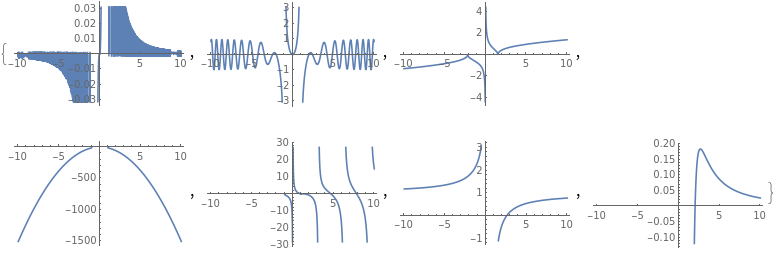

In [1]:
tasks = {
    Sin[2*x^3]^2/x^3
    , (x^2 - 4)*Sin[(Pi*(x^2))/6] / (x^2 - 1)
    , Sqrt[Abs[3*x^3 + 2*x^2 - 10*x]] / (4*x)
    , 1/2 * Log[Sqrt[x^2 + 1] / Sqrt[x^2 - 1]] - 15*x^2
    , (x^3 - x^2 - x + 1)^(1/3) / Tan[x]
    , 2*Log[(x - 1) / x] + 1
    , Log[x - 1] / (x - 1)^2
};

getVariantForNumber[number_, variationsQuo_]:=(
    Module[{t},
        t = Mod[number , variationsQuo];
        If[t != 0
                , t
                , variationsQuo
            ]
    ]
)
Table[Plot[tasks[[i]], {x, -10, 10}], {i, 1, Length[tasks]}]

Your task number: 1


3 2
Sin[2 x ]
----------
     3
    x
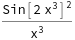

In [4]:
yourNumber = 29;
numberOfYourTask = getVariantForNumber[yourNumber, Length[tasks]];
Print["Your task number: ", numberOfYourTask]
f[y_] := tasks[[numberOfYourTask]]/.x->y;
f[x]

<h2> График функции </h2>

-Graphics-
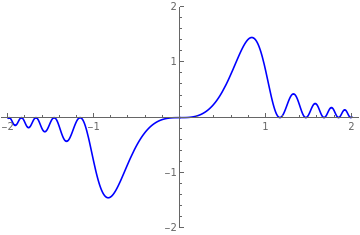

In [9]:
Plot[f[x], {x, -2, 2}, PlotRange->{-2,2}, PlotStyle->Blue]

<h2>1. Область определения функции </h2>

Функция не определена только в точке $x = 0$, так как числитель не может быть равен $0$.

In [10]:
a = 0;

<h2>2. Является ли функция четной или нечетной, является ли периодической. </h2>

Функция нечетная, если $y(-x) = -y(x)$, то есть $y(x) + y(-x) = 0$.

In [11]:
If[f[x] + f[-x] == 0, "Функция нечетная"]

Функция нечетная

In [12]:
Solve[f[x+T] == f[x], T];

This system cannot be solved with the methods available to Solve.: This system cannot be solved with the methods available to Solve.

Так как Solve не находит решений, функция не периодическая.

<h2>3. Точки пересечения графика с осями координат.</h2>

Точки пересечения с осью $y$ не существуют, так как функция не определена в точке $x=0$.
Точки пересечения с осью $x$:

-Graphics-
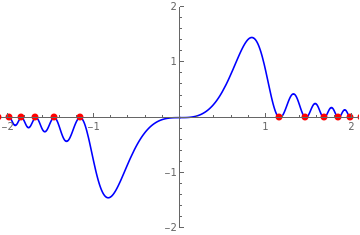

In [13]:
sols = {};
n = 10;
For[i = -n, i <= n, i++, 
    If[i == 0, Continue[], AppendTo[sols, Solve[2*x^3 == i*Pi, x]]]
]; 
ans = Flatten[sols, 1]; 

points = {x, 0} /. ans;
g1 = Plot[f[x], {x, -2, 2}, PlotRange->{-2,2}, PlotStyle->Blue ];
g2 = ListPlot[points, PlotStyle->{Red, PointSize[Large]}];
Show[{g1, g2}]

<h2>4. Промежутки знакопостоянства.</h2>

Функция нечётная и пересечение с осью $x$ только одно, значит необходимо определить значение в любой точке $x > 0$, знак при $x < 0$ будет другого знака. Так как $f(1) > 0$, то интервалы такие:

-Graphics-
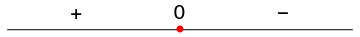

In [21]:
g1 = Graphics[Line[{{-5,0}, {5,0}}]];
g2 = Graphics[Text[Style["0", 20], {0, 0.5}]];
g3 = Graphics[{PointSize[Large], Red, Point[{0,0}]}];
g4 = Graphics[Text[Style["+", 20], {-3, 0.5}]];
g5 = Graphics[Text[Style["-", 20], {3, 0.5}]];
Show[{g1, g2, g3, g4, g5}]

<h2>5. Промежутки возрастания и убывания.</h2>

Для того, чтобы определить промежутки возрастания и убывания, необходимо найти экстремумы функции, между которыми они находятся. Это можно сделать найдя корни $f'(x)=0$.

In [27]:
x = . 
tmpf = Sin[2*x^3]^2/x^3; 
df = D[tmpf, x];

nearpoints = {0.8, 1.2};
sols = Table[
    FindRoot[
            df == 0
            , {x, i}
        ]
    , {i, Flatten[{nearpoints, -nearpoints}]}
];

К сожалению, делать промежутки пришлось руками, создание цикла автоматического добавления + и -, как я сделал в SageMath, заняло бы много времени.

-Graphics-
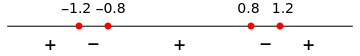

In [32]:
points = {x, 0} /. sols;
g1 = Graphics[Line[{{-2,0}, {2,0}}]];
g2 = ListPlot[points, PlotStyle->{Red, PointSize[Large]}];
gt1 = Graphics[Text[Style["0.8", 14], {0.8, 0.2}]];
gt2 = Graphics[Text[Style["1.2", 14], {1.2, 0.2}]];
gt3 = Graphics[Text[Style["-0.8", 14], {-0.8, 0.2}]];
gt4 = Graphics[Text[Style["-1.2", 14], {-1.2, 0.2}]];
gp1 = Graphics[Text[Style["+", 20], {-1.5, -0.2}]];
gp2 = Graphics[Text[Style["-", 20], {-1, -0.2}]];
gp3 = Graphics[Text[Style["+", 20], {0, -0.2}]];
gp4 = Graphics[Text[Style["-", 20], {1, -0.2}]];
gp5 = Graphics[Text[Style["+", 20], {1.5, -0.2}]];
Show[{g1, g2, gt1, gt2, gt3, gt4, gp1, gp2, gp3, gp4, gp5}]

<h2>6. Точки экстремума и значения в этих точках.</h2>

In [45]:
nearpoints = {0.8, 1.2, 1.37, 1.47, 1.6, 1.65, 1.78, 1.82, 1.9, 2};
sols = Table[
    FindRoot[
            df == 0
            , {x, i}
        ]
    , {i, Flatten[{nearpoints, -nearpoints}]}
];

-Graphics-
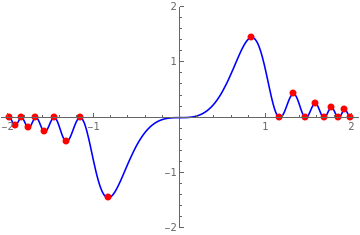

In [47]:
points = {x, f[x]} /. sols;
g1 = Plot[f[x], {x, -2, 2}, PlotRange->{-2,2}, PlotStyle->Blue ];
g2 = ListPlot[points, PlotStyle->{Red, PointSize[Large]}];
Show[{g1, g2}]

<h2>7. Непрерывность. Наличие точек разрыва и их классификация.</h2>

Если пределы к точке разрыва слева и справа равны, то эта точка называется устранимой точкой разрыва 1 рода.

In [51]:
rlim = Limit[f[x], x -> a, Direction -> "FromAbove"];
llim = Limit[f[x], x -> a, Direction -> "FromBelow"];

If[llim == rlim, "Точка разрыва 1 рода, устранимая."]

Точка разрыва 1 рода, устранимая.

<h2>8. Асимптоты.</h2>

Вертикальная асимптота не существует, так как предел к точке разрыва слева или справа не равен бесконечности.

In [54]:
Print["From below lim: ", llim]
Print["From above lim: ", rlim]

From below lim: 0
From above lim: 0


Наклонная асимптота существует, если $lim(y(x)/x), x\rightarrow \infty$ не равен $ \infty$ и $lim(y(x) - k*x), x \rightarrow  \infty$ не равен $ \infty$:

-Graphics-
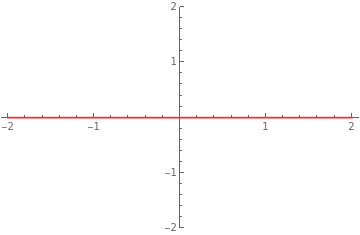

In [56]:
k = Limit[f[x]/x, x -> Infinity];
b = Limit[f[x] - k*x, x -> Infinity];

Show[Plot[k*x + b, {x, -2, 2}, PlotRange->{-2,2}, PlotStyle->Red]]